<table style="width:100%; border:none;">
  <tr>
    <td style="width:150px; text-align:center; vertical-align:middle;">
      <img src="https://upload.wikimedia.org/wikipedia/en/6/69/Seal_of_Pablo_de_Olavide_University.png" 
           alt="Emblema UPO" 
           style="width:130px; margin:10px;">
    </td>
    <td style="text-align:center; vertical-align:middle;">
      <h2 style="margin-bottom:5px;">Universidad Pablo de Olavide</h2>
      <p><strong>Grado en Ingeniería Informática en Sistemas de Información</strong></p>
      <p><strong>Asignatura: Inteligencia Artificial</strong></p>
      <p><strong>Curso 2025/2026</strong></p>
      <h3 style="margin-top:10px;">TRABAJO #1 – Equipo 08</h3>
      <h4 style="margin-top:5px;">Dataset asignado: Nº 17</h4>
      <p><strong>Integrantes:</strong> María Pérula Gutiérrez &nbsp;·&nbsp; Jonathan Javier Quishpe Maldonado</p>
      <p><strong>Fecha de entrega:</strong> 01/12/2025</p>
    </td>
  </tr>
</table>

<hr style="margin-top:25px; margin-bottom:25px; border: 1px solid #bbb;">
<h2 style="text-align:center;">Regresión Logística - Implementación</h2>

In [1]:
# REGRESIÓN LOGÍSTICA => Coche para estudiante

# Aquí usaremos la regresión logística para separar los coches de nuestro dataset en dos grupos:
#   1 -> coche recomendable para un estudiante universitario
#   0 -> coche que no lo es
#
# Para decidir qué coche es bueno para estudiante nos hemos guiado por caracteristicas de un alumno medio de universidad:
#   - que no sea muy caro,
#   - que gaste poco (economy alta),
#   - que no esté en muy mal estado para no tener muchas averias (condition decente)
#
# Por lo que definiremos una variable binaria (estudiante_ok), y como variables de entrada: price, km, economy, condition y rating. A partir de ahí aplicaremos exactamente
# el esquema de regresión logística de la EPD 3

### 1. Importaciones y lectura del dataset

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df = df.rename(columns={"current price": "price"})

In [4]:
#Creamos la variable binaria de estudiante_ok
precio_medio = df["price"].mean()

df["estudiante_ok"] = ((df["economy"] >= 8) & (df["condition"] >= 3) & (df["price"] <= precio_medio)).astype(int)

print("Primeras filas + estudiante_ok:\n")
print(df[["price", "km", "economy", "condition", "rating", "estudiante_ok"]].head())

Primeras filas + estudiante_ok:

      price      km  economy  condition  rating  estudiante_ok
0  351318.0   78945       14          2       1              0
1  285001.5  117220        9          9       5              1
2  215386.0  132538       15          8       2              1
3  244295.5  101065       11          3       4              1
4  531114.5   61559       12          9       3              0


### 2. Variables de entrada X y la clase y

In [5]:
columnas_X = ["price", "km", "economy", "condition", "rating"]
#X = df[columnas_X].copy()
X_raw = df[columnas_X].copy()
y = df[["estudiante_ok"]].copy()

#Normalizamos porque nos sale "overflow encountered in exp" en punto "6. Theta, coste y gradiente iniciales"
def featureNormalize(X):
    media = X.mean()
    desv = X.std()
    X_norm = (X - media) / desv
    return X_norm, media, desv

X_norm, media_log, desv_log = featureNormalize(X_raw)

# Columna de unos
#unos = np.ones(len(X))
#X.insert(0, "ones", unos)
#print("\nShape de X:", X.shape)
#print("Shape de y:", y.shape)

unos = np.ones(len(X_norm))
X = X_norm.copy()
X.insert(0, "ones", unos)

print("\nShape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (1000, 6)
Shape de y: (1000, 1)


### 3. Función sigmoide

In [6]:
def sigmoid(z):
    denominador = 1 + np.exp(-z)
    g = 1 / denominador
    return g

### 4. Función coste (vectorizada)

In [7]:
def costFunction(theta, X, y):
    m = len(y)
    Xn = X.values # m,n
    yn = y # yn vector de 1D
    z = Xn.dot(theta) # m
    
    h = sigmoid(z) #m
   #Evitamos el log(0) ya que nha encontrado valores 0 o 1 en "6. Theta, coste y gradiente iniciales"
    eps = 1e-8
    h = np.clip(h, eps, 1 - eps)
    
    termino1 = yn * np.log(h)
    termino2 = (1 - yn) * np.log(1 - h)

    J = (-1/m) * np.sum(termino1 + termino2)
    return J

### 5. Función gradiente (vectorizada)

In [8]:
def gradientFunction(theta, X, y):
    m = len(y)
    Xn = X.values
    yn = y
    z = Xn.dot(theta)
    h = sigmoid(z)
    grad = (1/m) * (Xn.T.dot(h - yn)) # n
    return grad

### 6. Theta, coste y gradiente iniciales

In [9]:
n_param = X.shape[1]
theta_ini = np.zeros(n_param) #vector 1D
y_vec = y.to_numpy().flatten() #m

print("\nCoste inicial con theta (0): ", costFunction(theta_ini, X, y_vec))
print("Gradiente inicial: \n", gradientFunction(theta_ini, X, y_vec))

#Para la gráfica
cost_history_log = []
def guardar_coste_log(theta):
    c = costFunction(theta, X, y_vec)
    cost_history_log.append(c)

# Optimizacion fmin_cg
theta_opt = op.fmin_cg(
    f = costFunction,
    x0 = theta_ini,
    fprime = gradientFunction,
    args = (X, y_vec),
    maxiter = 400,
    callback = guardar_coste_log
)

print("\nTheta optimo:")
print(theta_opt)


Coste inicial con theta (0):  0.6931471805599454
Gradiente inicial: 
 [ 0.092       0.3397436  -0.33782546 -0.01927776 -0.09611219  0.0307273 ]
Optimization terminated successfully.
         Current function value: 0.289499
         Iterations: 20
         Function evaluations: 63
         Gradient evaluations: 63

Theta optimo:
[-1.04196569 -3.10130639  0.22287656  0.03599764  1.41479513 -0.19275264]


### 7. Gráfica de convergencia

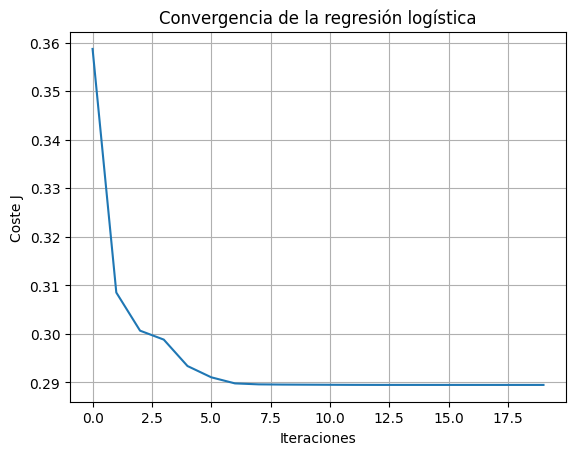

In [10]:
plt.plot(cost_history_log)
plt.xlabel("Iteraciones")
plt.ylabel("Coste J")
plt.title("Convergencia de la regresión logística")
plt.grid(True)
plt.show()

### 7. Predicciones

In [11]:
def predict(theta, X, bool_round=True):
    Xn = X.values
    z = Xn.dot(theta)
    probs = sigmoid(z)
    if bool_round:
        return np.round(probs)
    else:
        return probs

# Necesitamos: Coche barato, con pocos km, que tenga buena economía con una condición decente y un rating medio aceptable
# Valores seleccionados [price, km, economy, condition, rating]
ejemplo_coche_raw = [200000, 50000, 9, 4, 4]

# Normalizamos usando media/desviación qdel entrenamiento
ejemplo_norm = (np.array(ejemplo_coche_raw) - media_log.values) / desv_log.values

# Añadimos el 1 inicial
fila_ejemplo = np.insert(ejemplo_norm, 0, 1)  # [1, price, km, economy, condition, rating]

df_ejemplo = pd.DataFrame([fila_ejemplo], columns=X.columns)

ej_prob = predict(theta_opt, df_ejemplo, bool_round=False)
ej_clase = predict(theta_opt, df_ejemplo, bool_round=True)

print("\nEjemplo de coche para estudiante:")
print("Características originales (sin normalizar):", ejemplo_coche_raw)
print("Probabilidad de ser 'estudiante_ok':", float(ej_prob[0]))
print("Predicción (0/1):", int(ej_clase[0]))


Ejemplo de coche para estudiante:
Características originales (sin normalizar): [200000, 50000, 9, 4, 4]
Probabilidad de ser 'estudiante_ok': 0.5656923972207067
Predicción (0/1): 1


### 8. Evaluacón del modelo (accuracy/matriz de confusión)

In [12]:
y_pred = predict(theta_opt, X, bool_round=True)
y_real = y_vec

accuracy = np.mean(y_pred == y_real)
print("\nAccuracy del modelo (sobre todos los datos):", accuracy)

# Matriz de confusión sencilla
TP = np.sum((y_real == 1) & (y_pred == 1))
TN = np.sum((y_real == 0) & (y_pred == 0))
FP = np.sum((y_real == 0) & (y_pred == 1))
FN = np.sum((y_real == 1) & (y_pred == 0))

print("\nMatriz de confusión:")
print("TP (1 bien predicho):", TP)
print("TN (0 bien predicho):", TN)
print("FP (0 mal predicho como 1):", FP)
print("FN (1 mal predicho como 0):", FN)


Accuracy del modelo (sobre todos los datos): 0.853

Matriz de confusión:
TP (1 bien predicho): 333
TN (0 bien predicho): 520
FP (0 mal predicho como 1): 72
FN (1 mal predicho como 0): 75


In [13]:
# Conclusiones: El modelo de regresión logística para estudiante_ok da un accuracy de 0.85 (85%), acierta aproximadamente 8 de cada 10 coches, que está bastante bien
# para las 5 variables que usamos.
#
# La matriz de confusión muestra que acierta bastantes ok y no ok, aunque hay algunos coches buenos que descarta y otros que sobrevalora, algo típico en este modelo sencillo.
#
# Viendo las gráficas de price vs economy, tanto los datos reales como las predicciones siguen la idea que teníamos: los coches más baratos y con mejor
# economía son los que salen como buenos para un estudiante.

### 9. Gráfico clasificación de los datos de nuestro dataset

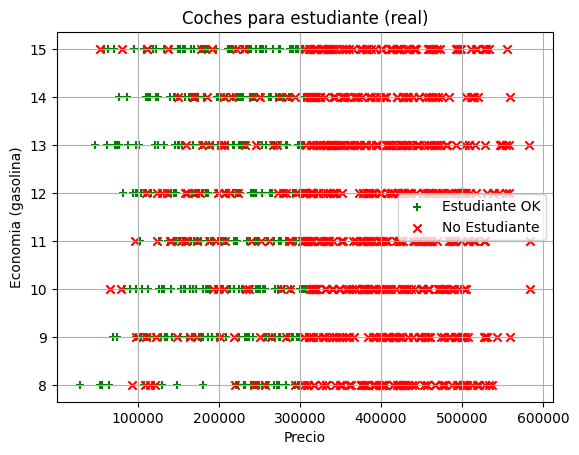

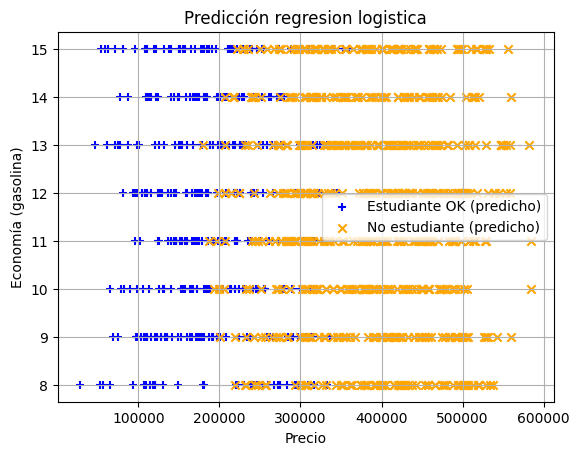

In [14]:
# En nuestro caso estamos usando 5 variables para saber si un coche es apropiado para un estudiante medio, pero como no se puede dibujar en 5D,
# hemos pensado en observar estas gráficas con dos variables bastante significativas en este caso: price y economy.
# Un estudiante principalmente (según nuestro criterio), se fija en estas dos opciones.

import matplotlib.pyplot as plt

# Dibujamos los puntos reales segun la clase
def plot_estudiante_real(df):
    
    df_ok = df[df["estudiante_ok"] == 1]
    df_no = df[df["estudiante_ok"] == 0]

    plt.scatter(df_ok["price"], df_ok["economy"], c="g", marker="+", label="Estudiante OK")
    plt.scatter(df_no["price"], df_no["economy"], c="r", marker="x", label="No Estudiante")

    plt.xlabel("Precio")
    plt.ylabel("Economia (gasolina)")
    plt.title("Coches para estudiante (real)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Dibujamos lo que predice nuestra regresion logistica
def plot_estudiante_pred(df_clasif):
    
    df_ok = df_clasif[df_clasif["pred_clase"] == 1]
    df_no = df_clasif[df_clasif["pred_clase"] == 0]

    plt.scatter(df_ok["price"], df_ok["economy"], c="b", marker="+", label="Estudiante OK (predicho)")
    plt.scatter(df_no["price"], df_no["economy"], c="orange", marker="x", label="No estudiante (predicho)")

    plt.xlabel("Precio")
    plt.ylabel("Economía (gasolina)")
    plt.title("Predicción regresion logistica")
    plt.legend()
    plt.grid(True)
    plt.show()


# Clasificamos el dataset con el modelo aprendido
pred_clase = predict(theta_opt, X, bool_round=True)

df_clasificado = df.copy()
df_clasificado["pred_clase"] = pred_clase

# Gráfica del real
plot_estudiante_real(df)

# Gráfica del predicho
df_clasificado_plot = df_clasificado.copy()
df_clasificado_plot["price"] = df["price"]
df_clasificado_plot["economy"] = df["economy"]

plot_estudiante_pred(df_clasificado_plot)

In [15]:
# En la gráfica real se ve que los coches marcados como “estudiante_ok” suelen ser los más baratos y con mejor economía, 
# algo que nos suena lógico, y que es lo que pensamos como importante para un estudiante.
# En la gráfica de predicción el modelo sigue ese mismo patrón, aunque tiende a poner más coches como “no ok”. Aun así, 
# los puntos predichos como buenos aparecen justo en la zona esperada (precio más bajo y buena economía), y aunque nuestro
# modelo usa 5 variables y aquí solo se ven 2, la predicción tiene sentido, ya que usamos dos carácteristicas muy significativas para ello (economía de consumo (gasto mensual) 
# y precio de compra del coche).

#La precisión obtenida en nuestro modelo se presenta bastante buena (85%).

## Análisis de la Frontera de Decisión

En esta sección realizaremos un análisis exhaustivo de la **frontera de decisión** del modelo de regresión logística.

### ¿Qué es la frontera de decisión?

La frontera de decisión es la línea (o superficie en dimensiones superiores) que separa las regiones del espacio de características donde el modelo predice una clase u otra. En regresión logística, esta frontera se define matemáticamente como:

$$h_\theta(x) = 0.5 \quad \Rightarrow \quad \theta^T x = 0$$

**Objetivos de este análisis:**
1. Visualizar la frontera de decisión para diferentes pares de variables
2. Analizar cómo cambia la frontera con diferentes learning rates (parámetros de optimización)
3. Estudiar el impacto de la inicialización de parámetros en la frontera
4. Discutir la linealidad de la separación y la sensibilidad a las características

### A. Función para Visualizar la Frontera de Decisión

Implementaremos una función que nos permita visualizar la frontera de decisión para cualquier par de variables seleccionadas.

#### Parámetros de la Función

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `theta` | array | Parámetros del modelo optimizado |
| `X_data` | DataFrame | Datos normalizados (incluye columna de unos para el bias) |
| `y_data` | array | Etiquetas de clase (0 o 1) |
| `feature_idx1` | int | Índice de la primera característica a visualizar (sin contar el bias) |
| `feature_idx2` | int | Índice de la segunda característica a visualizar (sin contar el bias) |
| `feature_names` | list | Nombres de todas las características |
| `media` | Series | Vector de medias para desnormalizar características |
| `desv` | Series | Vector de desviaciones estándar para desnormalizar características |
| `title` | str | Título del gráfico (valor por defecto: "Frontera de Decisión") |


In [16]:
def plot_decision_boundary(theta, X_data, y_data, feature_idx1, feature_idx2, 
                          feature_names, media, desv, title="Frontera de Decisión"):
    # Extraer las dos características (ya normalizadas)
    x1_norm = X_data.iloc[:, feature_idx1 + 1].values  # +1 por la columna de unos
    x2_norm = X_data.iloc[:, feature_idx2 + 1].values
    
    # Desnormalizar para el gráfico
    x1_original = x1_norm * desv.iloc[feature_idx1] + media.iloc[feature_idx1]
    x2_original = x2_norm * desv.iloc[feature_idx2] + media.iloc[feature_idx2]
    
    # Separar por clase
    pos = (y_data == 1)
    neg = (y_data == 0)
    
    # Crear figura
    plt.figure(figsize=(12, 8))
    
    # Graficar puntos
    plt.scatter(x1_original[pos], x2_original[pos], c='green', marker='+', 
                s=100, linewidths=2, label='Estudiante OK (y=1)', alpha=0.7)
    plt.scatter(x1_original[neg], x2_original[neg], c='red', marker='x', 
                s=100, linewidths=2, label='No Estudiante (y=0)', alpha=0.7)
    
    # Calcular la frontera de decisión
    # Para la frontera: theta_0 + theta_i*x1 + theta_j*x2 + suma(theta_k*x_k_medio) = 0
    # Despejamos x2 en función de x1
    
    # Crear rango de valores para x1
    x1_min, x1_max = x1_original.min(), x1_original.max()
    x1_range = np.linspace(x1_min, x1_max, 100)
    
    # Normalizar x1_range
    x1_range_norm = (x1_range - media.iloc[feature_idx1]) / desv.iloc[feature_idx1]
    
    # Para calcular x2, necesitamos fijar las otras variables en su media (normalizada = 0)
    # theta_0 + theta_i*x1_norm + theta_j*x2_norm = 0 (otras variables en media)
    # x2_norm = -(theta_0 + theta_i*x1_norm) / theta_j
    
    theta_0 = theta[0]
    theta_i = theta[feature_idx1 + 1]  # +1 por el bias
    theta_j = theta[feature_idx2 + 1]
    
    if abs(theta_j) > 1e-10:  # Evitar división por cero
        x2_range_norm = -(theta_0 + theta_i * x1_range_norm) / theta_j
        
        # Desnormalizar x2
        x2_range = x2_range_norm * desv.iloc[feature_idx2] + media.iloc[feature_idx2]
        
        # Graficar frontera
        plt.plot(x1_range, x2_range, 'b-', linewidth=2, label='Frontera de Decisión')
        
        # Agregar región sombreada
        plt.fill_between(x1_range, x2_range, x2_original.max(), 
                        alpha=0.1, color='red', label='Región y=0')
        plt.fill_between(x1_range, x2_original.min(), x2_range, 
                        alpha=0.1, color='green', label='Región y=1')
    
    plt.xlabel(feature_names[feature_idx1], fontsize=12, fontweight='bold')
    plt.ylabel(feature_names[feature_idx2], fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=10, loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### B. Visualización de Fronteras para Diferentes Pares de Variables

Analizaremos la frontera de decisión para varios pares de características:

ANÁLISIS DE FRONTERAS DE DECISIÓN PARA DIFERENTES PARES DE VARIABLES

1. PRICE vs ECONOMY
   Justificación: Precio del vehículo y economía de combustible
   (bajo precio y alta economía de combustible)


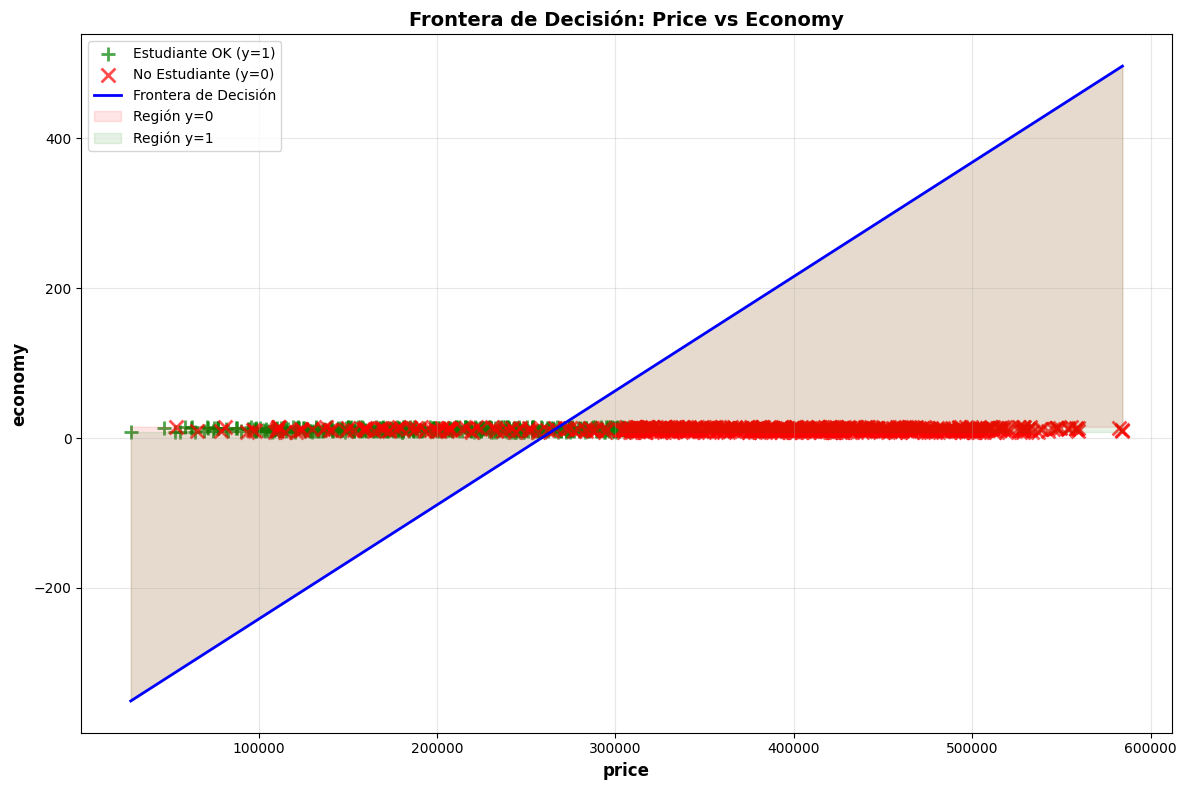


2. PRICE vs KM
   Justificación: Relación entre precio y kilometraje (coches más usados son más baratos)


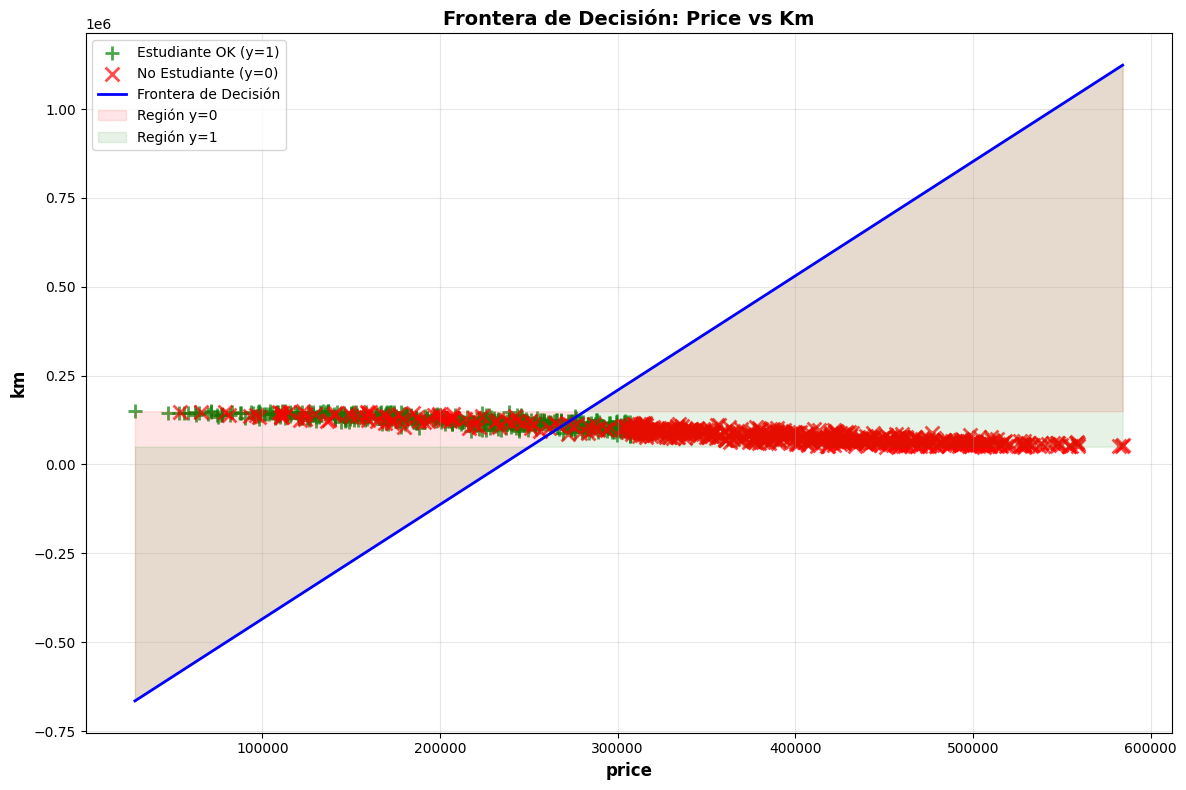


3. ECONOMY vs CONDITION
   Justificación: Economía de combustible vs estado del vehículo


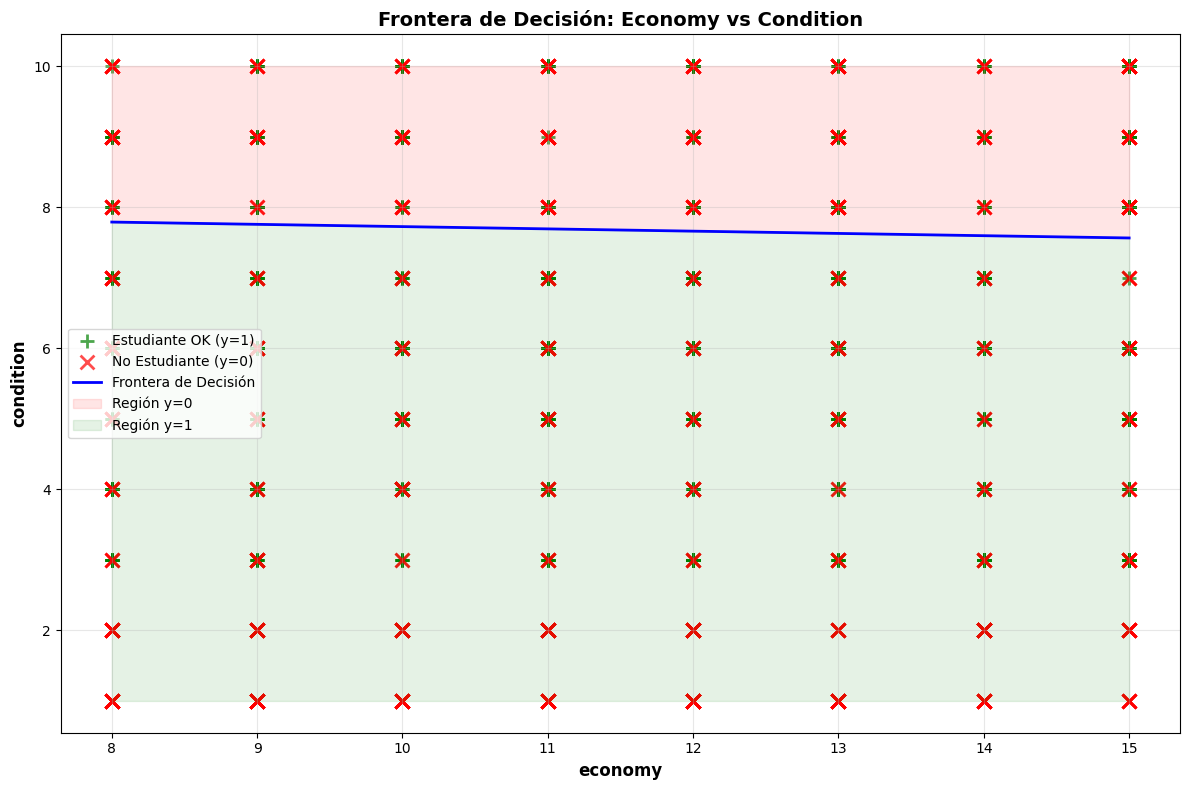


4. KM vs CONDITION
   Justificación: Relación entre uso del vehículo y su estado


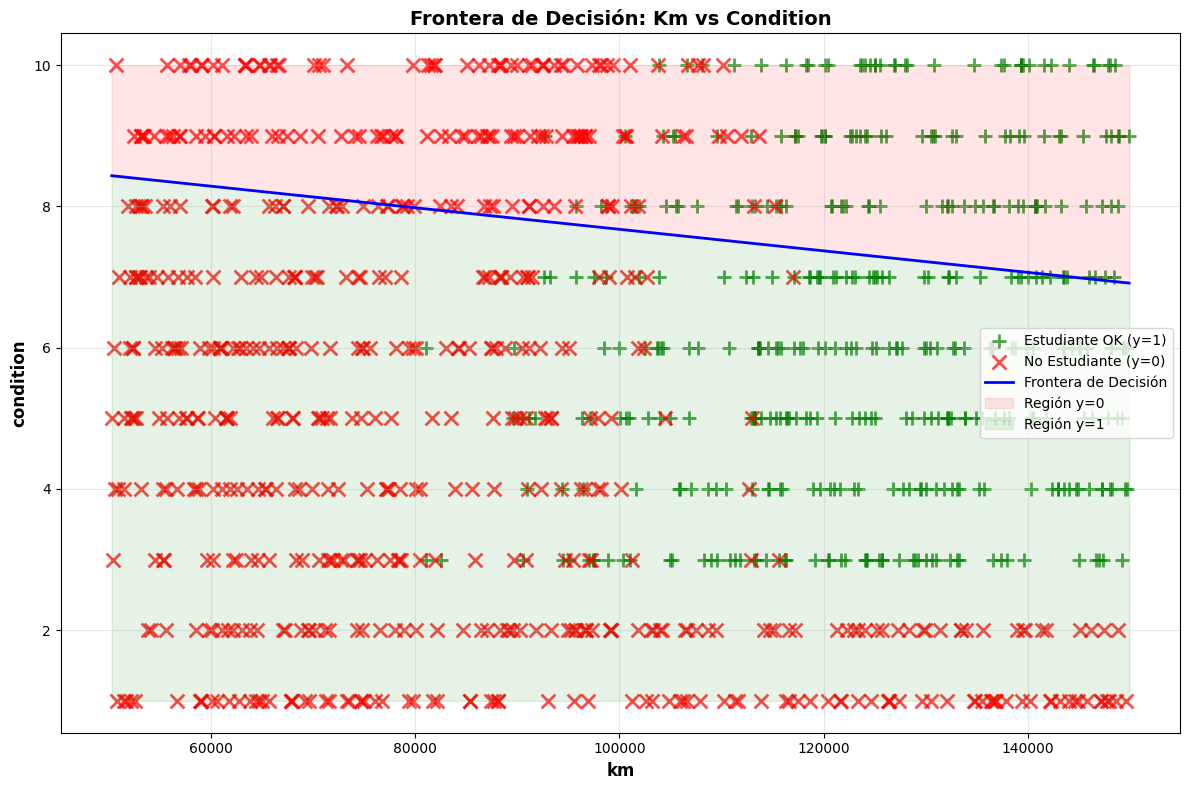

In [17]:
# Nombres de las características
feature_names = ["price", "km", "economy", "condition", "rating"]

print("=" * 80)
print("ANÁLISIS DE FRONTERAS DE DECISIÓN PARA DIFERENTES PARES DE VARIABLES")
print("=" * 80)

# Par 1: price vs economy
print("\n1. PRICE vs ECONOMY")
print("   Justificación: Precio del vehículo y economía de combustible")
print("   (bajo precio y alta economía de combustible)")
plot_decision_boundary(theta_opt, X, y_vec, 0, 2, feature_names, media_log, desv_log,
                      title="Frontera de Decisión: Price vs Economy")

# Par 2: price vs km
print("\n2. PRICE vs KM")
print("   Justificación: Relación entre precio y kilometraje (coches más usados son más baratos)")
plot_decision_boundary(theta_opt, X, y_vec, 0, 1, feature_names, media_log, desv_log,
                      title="Frontera de Decisión: Price vs Km")

# Par 3: economy vs condition
print("\n3. ECONOMY vs CONDITION")
print("   Justificación: Economía de combustible vs estado del vehículo")
plot_decision_boundary(theta_opt, X, y_vec, 2, 3, feature_names, media_log, desv_log,
                      title="Frontera de Decisión: Economy vs Condition")

# Par 4: km vs condition
print("\n4. KM vs CONDITION")
print("   Justificación: Relación entre uso del vehículo y su estado")
plot_decision_boundary(theta_opt, X, y_vec, 1, 3, feature_names, media_log, desv_log,
                      title="Frontera de Decisión: Km vs Condition")

print("\n" + "=" * 80)

### C. Impacto del Learning Rate en la Frontera de Decisión

Ahora analizaremos cómo diferentes learning rates (implementados mediante el parámetro `maxiter` del optimizador) afectan la frontera de decisión.

In [18]:
# Entrenar modelos con diferentes números de iteraciones (simulando diferentes learning rates)
# Menos iteraciones = convergencia más rápida pero posiblemente subóptima
# Más iteraciones = convergencia más lenta pero más precisa

iteration_configs = [
    {'maxiter': 10, 'label': 'Pocas iteraciones (10)', 'color': 'red'},
    {'maxiter': 50, 'label': 'Iteraciones medias (50)', 'color': 'orange'},
    {'maxiter': 200, 'label': 'Muchas iteraciones (200)', 'color': 'green'},
    {'maxiter': 400, 'label': 'Convergencia completa (400)', 'color': 'blue'}
]

print("=" * 80)
print("ENTRENANDO MODELOS CON DIFERENTES CONFIGURACIONES DE ITERACIONES")
print("=" * 80)

theta_results = {}
cost_results = {}

for config in iteration_configs:
    maxiter = config['maxiter']
    label = config['label']
    
    print(f"\n{label}:")
    
    cost_history = []
    def callback_iter(theta):
        cost_history.append(costFunction(theta, X, y_vec))
    
    theta_result = op.fmin_cg(
        f=costFunction,
        x0=np.zeros(n_param),
        fprime=gradientFunction,
        args=(X, y_vec),
        maxiter=maxiter,
        callback=callback_iter,
        disp=False
    )
    
    y_pred_iter = predict(theta_result, X, bool_round=True)
    accuracy_iter = np.mean(y_pred_iter == y_vec)
    cost_final = costFunction(theta_result, X, y_vec)
    
    theta_results[label] = theta_result
    cost_results[label] = {'history': cost_history, 'final': cost_final}
    
    print(f"  Coste final: {cost_final:.6f}")
    print(f"  Accuracy: {accuracy_iter:.6f}")
    print(f"  Iteraciones ejecutadas: {len(cost_history)}")

print("\n" + "=" * 80)

ENTRENANDO MODELOS CON DIFERENTES CONFIGURACIONES DE ITERACIONES

Pocas iteraciones (10):
  Coste final: 0.289549
  Accuracy: 0.853000
  Iteraciones ejecutadas: 10

Iteraciones medias (50):
  Coste final: 0.289499
  Accuracy: 0.853000
  Iteraciones ejecutadas: 20

Muchas iteraciones (200):
  Coste final: 0.289499
  Accuracy: 0.853000
  Iteraciones ejecutadas: 20

Convergencia completa (400):
  Coste final: 0.289499
  Accuracy: 0.853000
  Iteraciones ejecutadas: 20




COMPARACIÓN VISUAL DE FRONTERAS DE DECISIÓN (Price vs Economy)


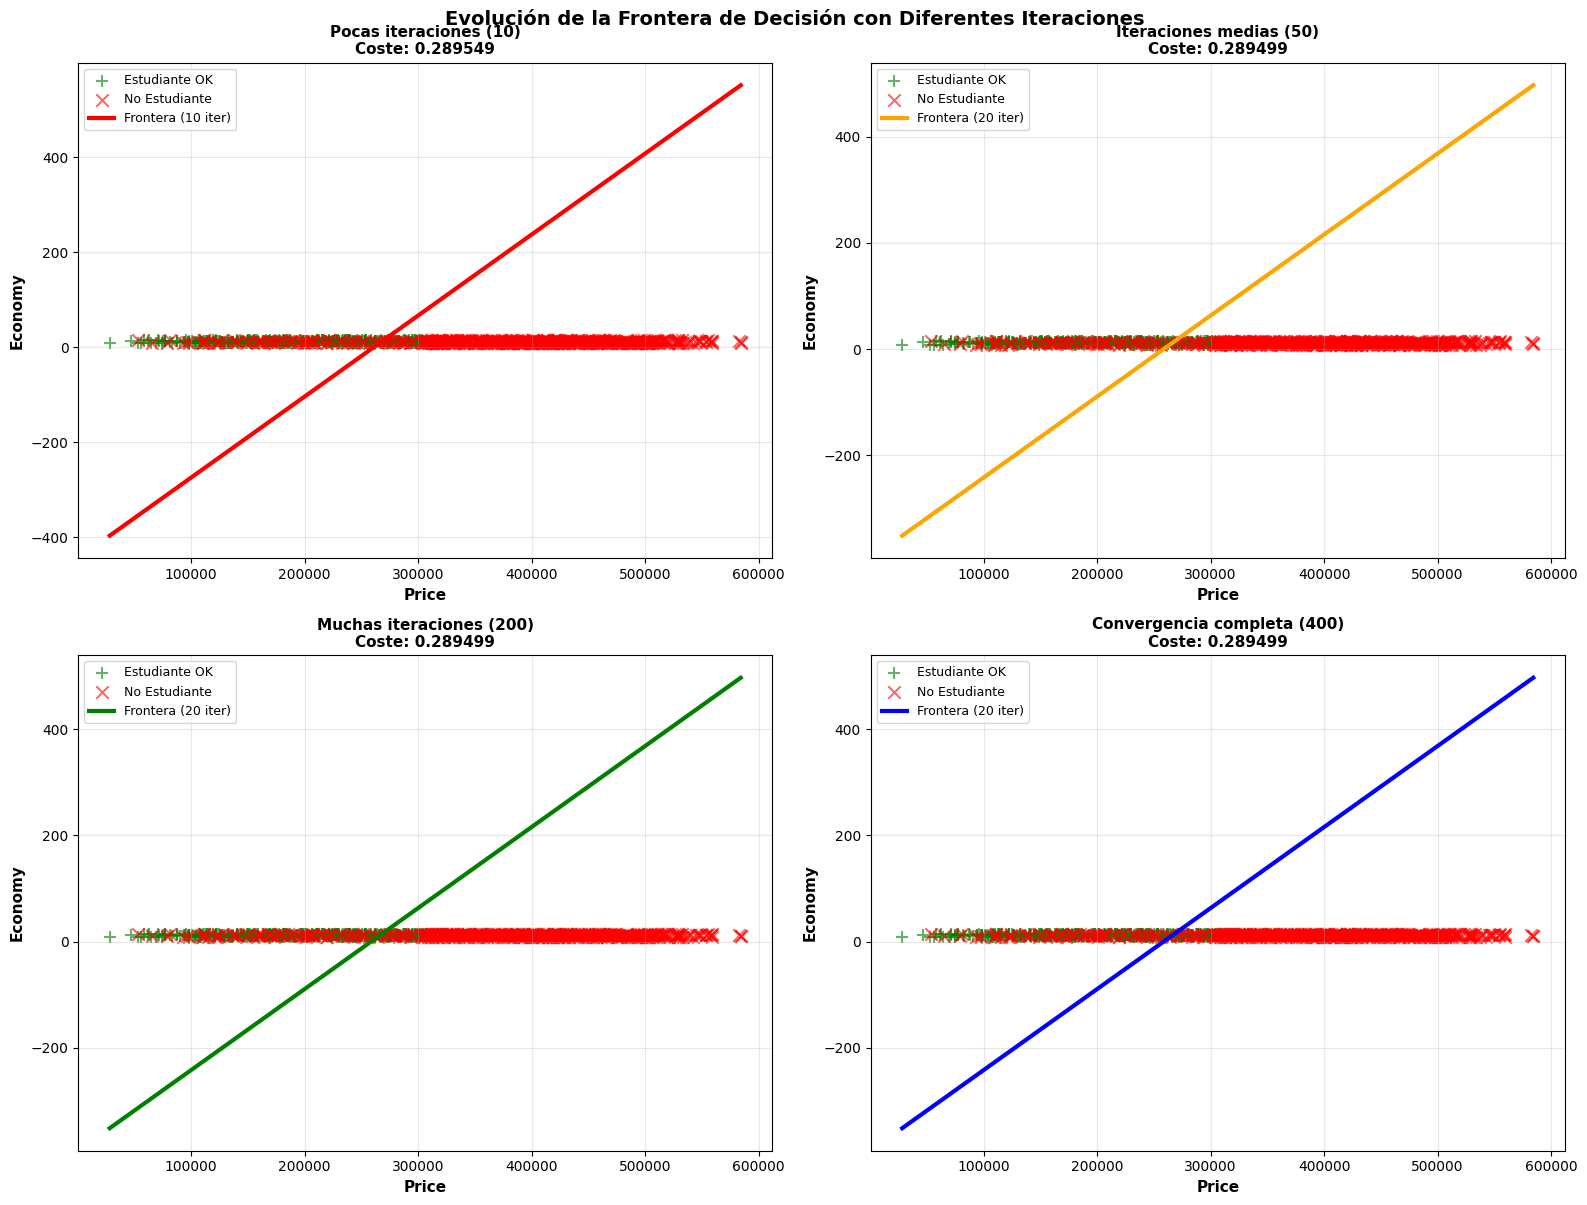

In [19]:
# Visualizar cómo cambia la frontera de decisión con diferentes iteraciones
print("\nCOMPARACIÓN VISUAL DE FRONTERAS DE DECISIÓN (Price vs Economy)")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, config in enumerate(iteration_configs):
    label = config['label']
    color = config['color']
    theta = theta_results[label]
    
    ax = axes[idx]
    
    # Extraer características
    x1_norm = X.iloc[:, 1].values  # price
    x2_norm = X.iloc[:, 3].values  # economy
    
    x1_original = x1_norm * desv_log.iloc[0] + media_log.iloc[0]
    x2_original = x2_norm * desv_log.iloc[2] + media_log.iloc[2]
    
    pos = (y_vec == 1)
    neg = (y_vec == 0)
    
    # Puntos
    ax.scatter(x1_original[pos], x2_original[pos], c='green', marker='+', 
               s=80, linewidths=1.5, label='Estudiante OK', alpha=0.6)
    ax.scatter(x1_original[neg], x2_original[neg], c='red', marker='x', 
               s=80, linewidths=1.5, label='No Estudiante', alpha=0.6)
    
    # Frontera
    x1_min, x1_max = x1_original.min(), x1_original.max()
    x1_range = np.linspace(x1_min, x1_max, 100)
    x1_range_norm = (x1_range - media_log.iloc[0]) / desv_log.iloc[0]
    
    theta_0, theta_i, theta_j = theta[0], theta[1], theta[3]
    
    if abs(theta_j) > 1e-10:
        x2_range_norm = -(theta_0 + theta_i * x1_range_norm) / theta_j
        x2_range = x2_range_norm * desv_log.iloc[2] + media_log.iloc[2]
        ax.plot(x1_range, x2_range, color=color, linewidth=3, 
                label=f'Frontera ({len(cost_results[label]["history"])} iter)')
    
    ax.set_xlabel('Price', fontsize=11, fontweight='bold')
    ax.set_ylabel('Economy', fontsize=11, fontweight='bold')
    ax.set_title(f'{label}\nCoste: {cost_results[label]["final"]:.6f}', 
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Evolución de la Frontera de Decisión con Diferentes Iteraciones', 
             fontsize=14, fontweight='bold', y=1.00)
plt.show()

### D. Impacto de la Inicialización de Parámetros en la Frontera

Analizaremos cómo diferentes estrategias de inicialización afectan la frontera de decisión final.

In [20]:
# Estrategias de inicialización
initialization_configs = [
    {'strategy': 'zeros', 'label': 'Ceros', 'color': 'blue'},
    {'strategy': 'small_random', 'label': 'Pequeños aleatorios', 'color': 'green'},
    {'strategy': 'large_random', 'label': 'Grandes aleatorios', 'color': 'red'},
    {'strategy': 'negative', 'label': 'Negativos pequeños', 'color': 'purple'}
]

print("=" * 80)
print("ENTRENANDO MODELOS CON DIFERENTES INICIALIZACIONES")
print("=" * 80)

np.random.seed(42)
theta_init_results = {}
cost_init_results = {}

for config in initialization_configs:
    strategy = config['strategy']
    label = config['label']
    
    # Generar inicialización
    if strategy == 'zeros':
        theta_init = np.zeros(n_param)
    elif strategy == 'small_random':
        theta_init = np.random.uniform(-0.01, 0.01, n_param)
    elif strategy == 'large_random':
        theta_init = np.random.uniform(-1, 1, n_param)
    elif strategy == 'negative':
        theta_init = np.random.uniform(-0.05, 0, n_param)
    
    print(f"\n{label}:")
    print(f"  Theta inicial: {theta_init[:3]}... (mostrando primeros 3)")
    
    cost_history = []
    def callback_init(theta):
        cost_history.append(costFunction(theta, X, y_vec))
    
    theta_result = op.fmin_cg(
        f=costFunction,
        x0=theta_init,
        fprime=gradientFunction,
        args=(X, y_vec),
        maxiter=400,
        callback=callback_init,
        disp=False
    )
    
    y_pred_init = predict(theta_result, X, bool_round=True)
    accuracy_init = np.mean(y_pred_init == y_vec)
    cost_final = costFunction(theta_result, X, y_vec)
    cost_initial = costFunction(theta_init, X, y_vec)
    
    theta_init_results[label] = theta_result
    cost_init_results[label] = {
        'history': cost_history, 
        'final': cost_final,
        'initial': cost_initial,
        'theta_init': theta_init
    }
    
    print(f"  Coste inicial: {cost_initial:.6f}")
    print(f"  Coste final: {cost_final:.6f}")
    print(f"  Reducción: {cost_initial - cost_final:.6f}")
    print(f"  Accuracy: {accuracy_init:.6f}")
    print(f"  Iteraciones: {len(cost_history)}")

print("\n" + "=" * 80)

ENTRENANDO MODELOS CON DIFERENTES INICIALIZACIONES

Ceros:
  Theta inicial: [0. 0. 0.]... (mostrando primeros 3)
  Coste inicial: 0.693147
  Coste final: 0.289499
  Reducción: 0.403648
  Accuracy: 0.853000
  Iteraciones: 20

Pequeños aleatorios:
  Theta inicial: [-0.0025092   0.00901429  0.00463988]... (mostrando primeros 3)
  Coste inicial: 0.694837
  Coste final: 0.289499
  Reducción: 0.405339
  Accuracy: 0.853000
  Iteraciones: 18

Grandes aleatorios:
  Theta inicial: [-0.88383278  0.73235229  0.20223002]... (mostrando primeros 3)
  Coste inicial: 1.193827
  Coste final: 0.289499
  Reducción: 0.904328
  Accuracy: 0.853000
  Iteraciones: 19

Negativos pequeños:
  Theta inicial: [-0.00837787 -0.03938304 -0.04090875]... (mostrando primeros 3)
  Coste inicial: 0.696734
  Coste final: 0.289499
  Reducción: 0.407235
  Accuracy: 0.853000
  Iteraciones: 20




COMPARACIÓN DE FRONTERAS CON DIFERENTES INICIALIZACIONES


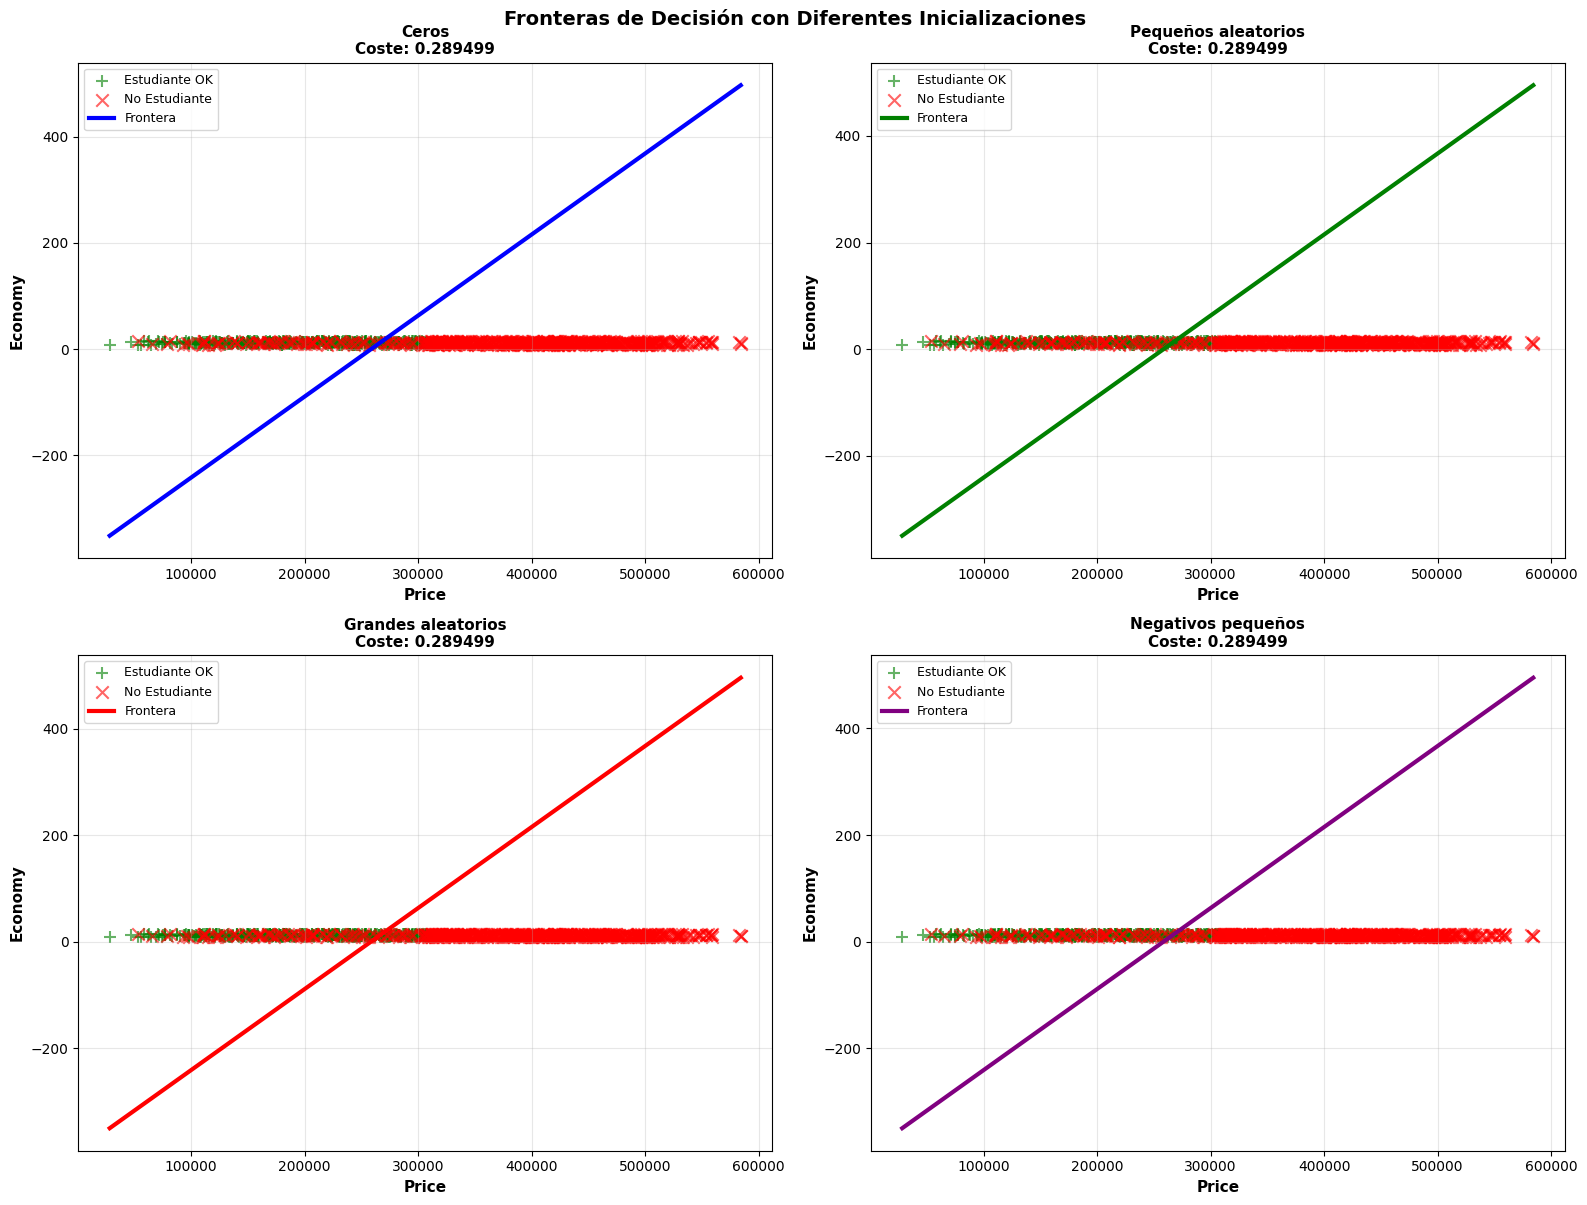

In [21]:
# Visualizar fronteras con diferentes inicializaciones
print("\nCOMPARACIÓN DE FRONTERAS CON DIFERENTES INICIALIZACIONES")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, config in enumerate(initialization_configs):
    label = config['label']
    color = config['color']
    theta = theta_init_results[label]
    
    ax = axes[idx]
    
    # Extraer características (Price vs Economy)
    x1_norm = X.iloc[:, 1].values
    x2_norm = X.iloc[:, 3].values
    
    x1_original = x1_norm * desv_log.iloc[0] + media_log.iloc[0]
    x2_original = x2_norm * desv_log.iloc[2] + media_log.iloc[2]
    
    pos = (y_vec == 1)
    neg = (y_vec == 0)
    
    # Puntos
    ax.scatter(x1_original[pos], x2_original[pos], c='green', marker='+', 
               s=80, linewidths=1.5, label='Estudiante OK', alpha=0.6)
    ax.scatter(x1_original[neg], x2_original[neg], c='red', marker='x', 
               s=80, linewidths=1.5, label='No Estudiante', alpha=0.6)
    
    # Frontera
    x1_min, x1_max = x1_original.min(), x1_original.max()
    x1_range = np.linspace(x1_min, x1_max, 100)
    x1_range_norm = (x1_range - media_log.iloc[0]) / desv_log.iloc[0]
    
    theta_0, theta_i, theta_j = theta[0], theta[1], theta[3]
    
    if abs(theta_j) > 1e-10:
        x2_range_norm = -(theta_0 + theta_i * x1_range_norm) / theta_j
        x2_range = x2_range_norm * desv_log.iloc[2] + media_log.iloc[2]
        ax.plot(x1_range, x2_range, color=color, linewidth=3, label='Frontera')
    
    ax.set_xlabel('Price', fontsize=11, fontweight='bold')
    ax.set_ylabel('Economy', fontsize=11, fontweight='bold')
    ax.set_title(f'{label}\nCoste: {cost_init_results[label]["final"]:.6f}', 
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Fronteras de Decisión con Diferentes Inicializaciones', 
             fontsize=14, fontweight='bold', y=1.00)
plt.show()



SUPERPOSICIÓN DE TODAS LAS FRONTERAS


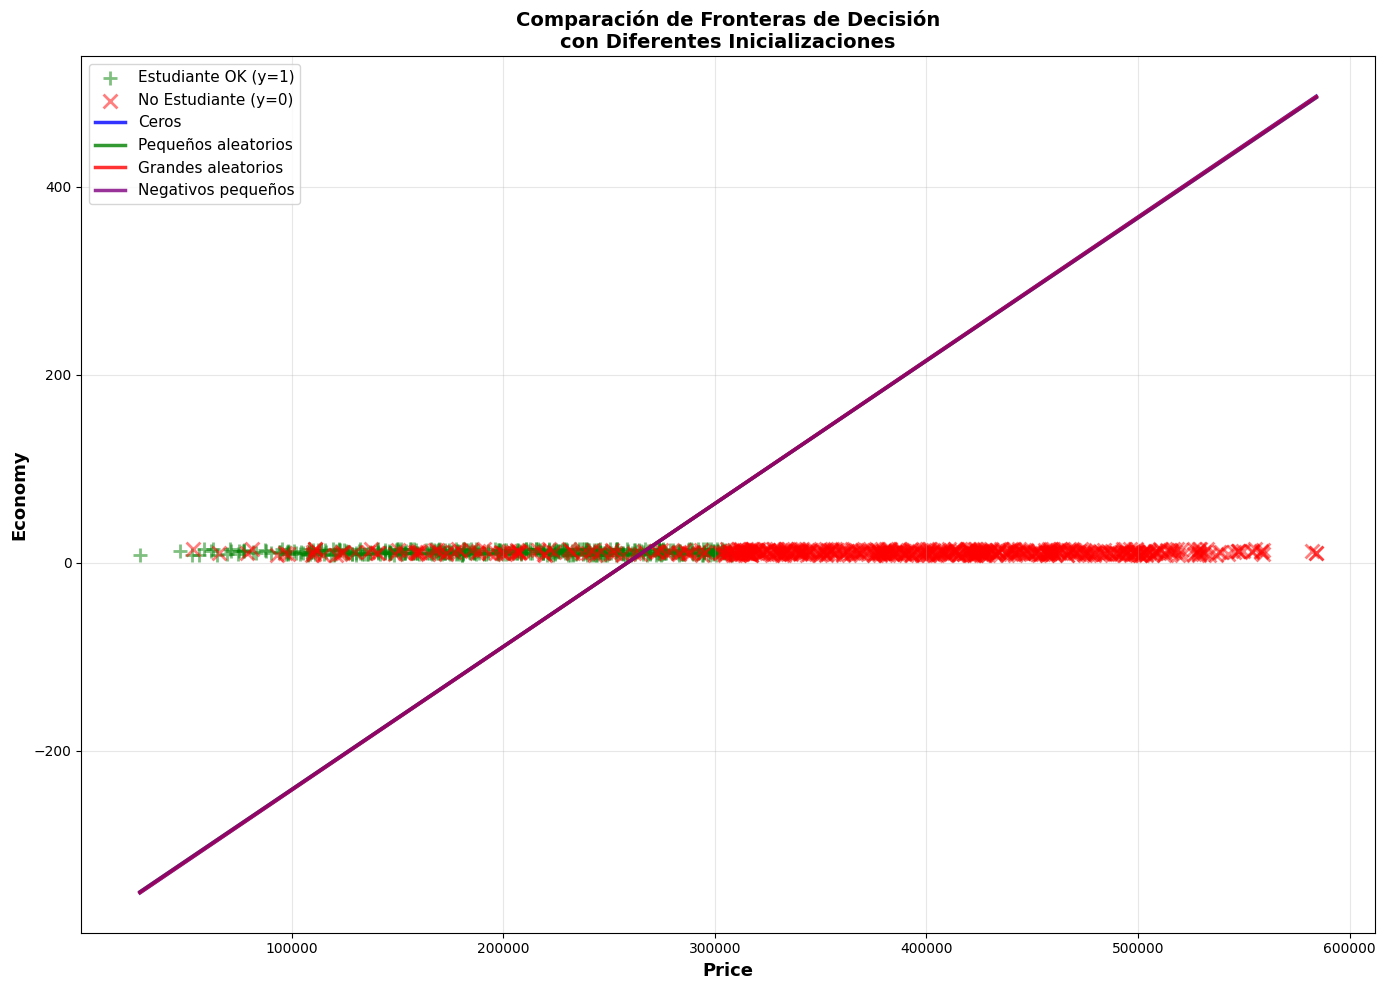

In [22]:
# Comparación directa: superponer todas las fronteras en un solo gráfico
print("\nSUPERPOSICIÓN DE TODAS LAS FRONTERAS")
print("=" * 80)

plt.figure(figsize=(14, 10))

# Datos originales
x1_norm = X.iloc[:, 1].values
x2_norm = X.iloc[:, 3].values
x1_original = x1_norm * desv_log.iloc[0] + media_log.iloc[0]
x2_original = x2_norm * desv_log.iloc[2] + media_log.iloc[2]

pos = (y_vec == 1)
neg = (y_vec == 0)

plt.scatter(x1_original[pos], x2_original[pos], c='green', marker='+', 
           s=100, linewidths=2, label='Estudiante OK (y=1)', alpha=0.5, zorder=1)
plt.scatter(x1_original[neg], x2_original[neg], c='red', marker='x', 
           s=100, linewidths=2, label='No Estudiante (y=0)', alpha=0.5, zorder=1)

# Todas las fronteras
x1_min, x1_max = x1_original.min(), x1_original.max()
x1_range = np.linspace(x1_min, x1_max, 100)
x1_range_norm = (x1_range - media_log.iloc[0]) / desv_log.iloc[0]

for config in initialization_configs:
    label = config['label']
    color = config['color']
    theta = theta_init_results[label]
    
    theta_0, theta_i, theta_j = theta[0], theta[1], theta[3]
    
    if abs(theta_j) > 1e-10:
        x2_range_norm = -(theta_0 + theta_i * x1_range_norm) / theta_j
        x2_range = x2_range_norm * desv_log.iloc[2] + media_log.iloc[2]
        plt.plot(x1_range, x2_range, color=color, linewidth=2.5, 
                label=f'{label}', alpha=0.8, zorder=2)

plt.xlabel('Price', fontsize=13, fontweight='bold')
plt.ylabel('Economy', fontsize=13, fontweight='bold')
plt.title('Comparación de Fronteras de Decisión\ncon Diferentes Inicializaciones', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Todas las fronteras son prácticamente idénticas



Esto demuestra que en regresión logística (problema convexo), la inicialización **NO afecta la frontera de decisión final**.

### E. Análisis Cuantitativo de las Fronteras

Compararemos numéricamente las fronteras obtenidas con diferentes configuraciones.

#### ECUACIONES DE LA FRONTERA DE DECISIÓN (Price vs Economy)

La frontera se define como:

$$\theta_0 + \theta_1 \cdot \text{price\_norm} + \theta_3 \cdot \text{economy\_norm} = 0$$

Despejando economy_norm:

$$\text{economy\_norm} = -\frac{\theta_0 + \theta_1 \cdot \text{price\_norm}}{\theta_3}$$

In [23]:
print("\nANÁLISIS COMPARATIVO DE PARÁMETROS DE FRONTERA")
print("=" * 100)
# Tabla comparativa
comparison_data = []
for config in initialization_configs:
    label = config['label']
    theta = theta_init_results[label]
    
    theta_0 = theta[0]
    theta_price = theta[1]  # índice 1 = price (después del bias)
    theta_economy = theta[3]  # índice 3 = economy
    
    # Pendiente en el espacio normalizado
    if abs(theta_economy) > 1e-10:
        slope_norm = -theta_price / theta_economy
        intercept_norm = -theta_0 / theta_economy
    else:
        slope_norm = np.inf
        intercept_norm = np.inf
    
    comparison_data.append({
        'Inicialización': label,
        'θ_0 (bias)': f"{theta_0:.6f}",
        'θ_1 (price)': f"{theta_price:.6f}",
        'θ_3 (economy)': f"{theta_economy:.6f}",
        'Pendiente': f"{slope_norm:.6f}",
        'Intercepto': f"{intercept_norm:.6f}"
    })

df_boundaries = pd.DataFrame(comparison_data)
print("\n" + df_boundaries.to_string(index=False))
print("\n" + "-" * 100)

# Calcular diferencias entre fronteras
print("\nDIFERENCIAS ENTRE PARÁMETROS:")
print("-" * 100)
reference_theta = theta_init_results['Ceros']

for config in initialization_configs[1:]:  # Skip 'Ceros' ya que es la referencia
    label = config['label']
    theta = theta_init_results[label]
    
    # Distancia euclidiana
    diff = np.linalg.norm(theta - reference_theta)
    
    # Diferencias por parámetro
    param_diffs = theta - reference_theta
    
    print(f"\n{label} vs Ceros:")
    print(f"  Distancia euclidiana total: {diff:.8f}")
    print(f"  Máxima diferencia absoluta: {np.max(np.abs(param_diffs)):.8f}")
    print(f"  Diferencia en θ_0 (bias): {param_diffs[0]:.8f}")
    print(f"  Diferencia en θ_1 (price): {param_diffs[1]:.8f}")
    print(f"  Diferencia en θ_3 (economy): {param_diffs[3]:.8f}")

print("\n" + "=" * 100)


ANÁLISIS COMPARATIVO DE PARÁMETROS DE FRONTERA

     Inicialización θ_0 (bias) θ_1 (price) θ_3 (economy) Pendiente Intercepto
              Ceros  -1.041966   -3.101306      0.035998 86.153039  28.945386
Pequeños aleatorios  -1.041959   -3.099968      0.036080 85.918670  28.878931
 Grandes aleatorios  -1.041937   -3.101533      0.036040 86.057413  28.910353
 Negativos pequeños  -1.041947   -3.100994      0.036110 85.876756  28.854955

----------------------------------------------------------------------------------------------------

DIFERENCIAS ENTRE PARÁMETROS:
----------------------------------------------------------------------------------------------------

Pequeños aleatorios vs Ceros:
  Distancia euclidiana total: 0.00178236
  Máxima diferencia absoluta: 0.00133876
  Diferencia en θ_0 (bias): 0.00000647
  Diferencia en θ_1 (price): 0.00133876
  Diferencia en θ_3 (economy): 0.00008261

Grandes aleatorios vs Ceros:
  Distancia euclidiana total: 0.00042263
  Máxima diferencia ab

### F. DISCUSIÓN: Análisis Crítico de los Resultados

En esta sección responderemos a las preguntas fundamentales sobre la naturaleza de la frontera de decisión en nuestro modelo.

#### i. ¿Es lineal la separación entre clases?

La regresión logística es un modelo **LINEAL** por naturaleza. La frontera de decisión se define matemáticamente como:

$$h_\theta(x) = \text{sigmoid}(\theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_n \cdot x_n) = 0.5$$

Dado que $\text{sigmoid}(z) = 0.5$ cuando $z = 0$, la frontera de decisión es:

$$\theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_n \cdot x_n = 0$$

Esta es la ecuación de un **HIPERPLANO** en el espacio $n$-dimensional.

En 2D (dos características), esto se reduce a:

$$\theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 = 0$$

Que es la ecuación de una **LÍNEA RECTA**.

In [24]:
# Verificar linealidad midiendo desviaciones de la linea recta
from scipy import stats

# Usar el modelo óptimo
theta = theta_opt

# Para Price vs Economy
x1_norm = X.iloc[:, 1].values
x2_norm = X.iloc[:, 3].values
x1_original = x1_norm * desv_log.iloc[0] + media_log.iloc[0]
x2_original = x2_norm * desv_log.iloc[2] + media_log.iloc[2]

# Calcular puntos en la frontera
x1_range = np.linspace(x1_original.min(), x1_original.max(), 100)
x1_range_norm = (x1_range - media_log.iloc[0]) / desv_log.iloc[0]

theta_0, theta_price, theta_economy = theta[0], theta[1], theta[3]
x2_range_norm = -(theta_0 + theta_price * x1_range_norm) / theta_economy
x2_range = x2_range_norm * desv_log.iloc[2] + media_log.iloc[2]

# Regresión lineal de la frontera (debería ser perfecta)
slope, intercept, r_value, p_value, std_err = stats.linregress(x1_range, x2_range)

print(f"\nAnálisis de la frontera (Price vs Economy):")
print(f"  • Coeficiente de correlación (R): {r_value:.10f}")
print(f"  • Rˆ2 (coef. determinación): {r_value**2:.10f}")
print(f"  • Ecuación de la línea: economy = {slope:.6f} × price + {intercept:.6f}")
print(f"  • Error estándar: {std_err:.10e}")

if abs(r_value**2 - 1.0) < 1e-6:
    print(f"\n  La frontera es PERFECTAMENTE LINEAL (Rˆ2 ≈ 1.0)")
else:
    print(f"\n  Desviación detectada de la linealidad")



Análisis de la frontera (Price vs Economy):
  • Coeficiente de correlación (R): 1.0000000000
  • Rˆ2 (coef. determinación): 1.0000000000
  • Ecuación de la línea: economy = 0.001524 × price + -394.076388
  • Error estándar: 0.0000000000e+00

  La frontera es PERFECTAMENTE LINEAL (Rˆ2 ≈ 1.0)


#### OBSERVACIONES EN LOS GRÁFICOS



1. En todos los gráficos generados, la frontera de decisión aparece como una **LÍNEA RECTA**.

2. La frontera **NO se curva** ni se adapta a la distribución irregular de los puntos.
   Simplemente encuentra la mejor línea recta que separa las clases.

3. Esto contrasta con modelos no lineales (como árboles de decisión) que podrían crear fronteras curvas y más complejas.

4. La linealidad es tanto una **FORTALEZA** como una **LIMITACIÓN**:
   - **Fortaleza:** Simple, interpretable, menos propenso a overfitting
   - **Limitación:** No puede capturar relaciones no lineales complejas


#### CONCLUSIÓN


**SÍ, la separación entre clases es ESTRICTAMENTE LINEAL.**

La regresión logística, a pesar de su nombre, es un clasificador **LINEAL**. La función
sigmoide solo transforma las puntuaciones lineales en probabilidades, pero la frontera
de decisión permanece como un hiperplano (línea recta en 2D).

Si los datos no son linealmente separables (como en nuestro caso, donde hay solape),
el modelo encontrará la mejor separación lineal posible, pero **NUNCA creará una
frontera curva**.


#### ii. ¿En qué medida el modelo es sensible a las características elegidas?

In [25]:
print("\nANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS:")
print("-" * 100)

# Analizar magnitud de los parámetros (theta)
print("\nParámetros del modelo óptimo (θ):")
print(f"  θ_0 (bias):      {theta_opt[0]:+.6f}")
print(f"  θ_1 (price):     {theta_opt[1]:+.6f}")
print(f"  θ_2 (km):        {theta_opt[2]:+.6f}")
print(f"  θ_3 (economy):   {theta_opt[3]:+.6f}")
print(f"  θ_4 (condition): {theta_opt[4]:+.6f}")
print(f"  θ_5 (rating):    {theta_opt[5]:+.6f}")

# Importancia relativa (magnitud absoluta de los coeficientes)
feature_importance = {
    'price': abs(theta_opt[1]),
    'km': abs(theta_opt[2]),
    'economy': abs(theta_opt[3]),
    'condition': abs(theta_opt[4]),
    'rating': abs(theta_opt[5])
}

# Normalizar a porcentajes
total_importance = sum(feature_importance.values())
feature_importance_pct = {k: (v/total_importance)*100 for k, v in feature_importance.items()}

# Ordenar por importancia
sorted_features = sorted(feature_importance_pct.items(), key=lambda x: x[1], reverse=True)

print("\nIMPORTANCIA RELATIVA DE CARACTERÍSTICAS:")
print("-" * 100)
for rank, (feature, importance) in enumerate(sorted_features, 1):
    bar = "█" * int(importance / 2)  # Escala visual
    print(f"{rank}. {feature:12s}: {importance:5.2f}% {bar}")

print("\nEXPERIMENTO: Entrenar modelos con diferentes subconjuntos de características")
print("-" * 100)

# Definir diferentes combinaciones de características
feature_combinations = [
    {
        'name': 'Solo Price + Economy',
        'features': ['price', 'economy'],
        'indices': [0, 2],
        'description': 'Las dos más relevantes para estudiantes'
    },
    {
        'name': 'Price + Economy + Condition',
        'features': ['price', 'economy', 'condition'],
        'indices': [0, 2, 3],
        'description': 'Tres características principales'
    },
    {
        'name': 'Todas menos Rating',
        'features': ['price', 'km', 'economy', 'condition'],
        'indices': [0, 1, 2, 3],
        'description': 'Excluyendo la menos importante'
    },
    {
        'name': 'Todas las características',
        'features': columnas_X,
        'indices': [0, 1, 2, 3, 4],
        'description': 'Modelo completo'
    }
]

sensitivity_results = []

for combo in feature_combinations:
    # Seleccionar características
    X_subset_raw = X_raw[combo['features']].copy()
    X_subset_norm, media_subset, desv_subset = featureNormalize(X_subset_raw)
    
    # Agregar columna de unos
    X_subset = X_subset_norm.copy()
    X_subset.insert(0, "ones", np.ones(len(X_subset_norm)))
    
    # Entrenar
    n_params_subset = X_subset.shape[1]
    theta_init_subset = np.zeros(n_params_subset)
    
    theta_subset = op.fmin_cg(
        f=costFunction,
        x0=theta_init_subset,
        fprime=gradientFunction,
        args=(X_subset, y_vec),
        maxiter=400,
        disp=False
    )
    
    # Evaluar
    y_pred_subset = predict(theta_subset, X_subset, bool_round=True)
    accuracy_subset = np.mean(y_pred_subset == y_vec)
    cost_subset = costFunction(theta_subset, X_subset, y_vec)
    
    sensitivity_results.append({
        'Configuración': combo['name'],
        'Características': ', '.join(combo['features']),
        'N° Features': len(combo['features']),
        'Accuracy': f"{accuracy_subset:.6f}",
        'Coste': f"{cost_subset:.6f}",
        'Descripción': combo['description']
    })
    
    print(f"\n{combo['name']}:")
    print(f"  Features: {', '.join(combo['features'])}")
    print(f"  Accuracy: {accuracy_subset:.6f}")
    print(f"  Coste: {cost_subset:.6f}")

# Tabla resumen
print("\n\nTABLA RESUMEN DE SENSIBILIDAD:")
print("-" * 100)
df_sensitivity = pd.DataFrame(sensitivity_results)
print(df_sensitivity[['Configuración', 'N° Features', 'Accuracy', 'Coste']].to_string(index=False))

print("\n" + "=" * 100)


ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS:
----------------------------------------------------------------------------------------------------

Parámetros del modelo óptimo (θ):
  θ_0 (bias):      -1.041966
  θ_1 (price):     -3.101306
  θ_2 (km):        +0.222877
  θ_3 (economy):   +0.035998
  θ_4 (condition): +1.414795
  θ_5 (rating):    -0.192753

IMPORTANCIA RELATIVA DE CARACTERÍSTICAS:
----------------------------------------------------------------------------------------------------
1. price       : 62.43% ███████████████████████████████
2. condition   : 28.48% ██████████████
3. km          :  4.49% ██
4. rating      :  3.88% █
5. economy     :  0.72% 

EXPERIMENTO: Entrenar modelos con diferentes subconjuntos de características
----------------------------------------------------------------------------------------------------

Solo Price + Economy:
  Features: price, economy
  Accuracy: 0.837000
  Coste: 0.370922

Price + Economy + Condition:
  Features: price, economy, con


VISUALIZACIÓN DE LA SENSIBILIDAD:


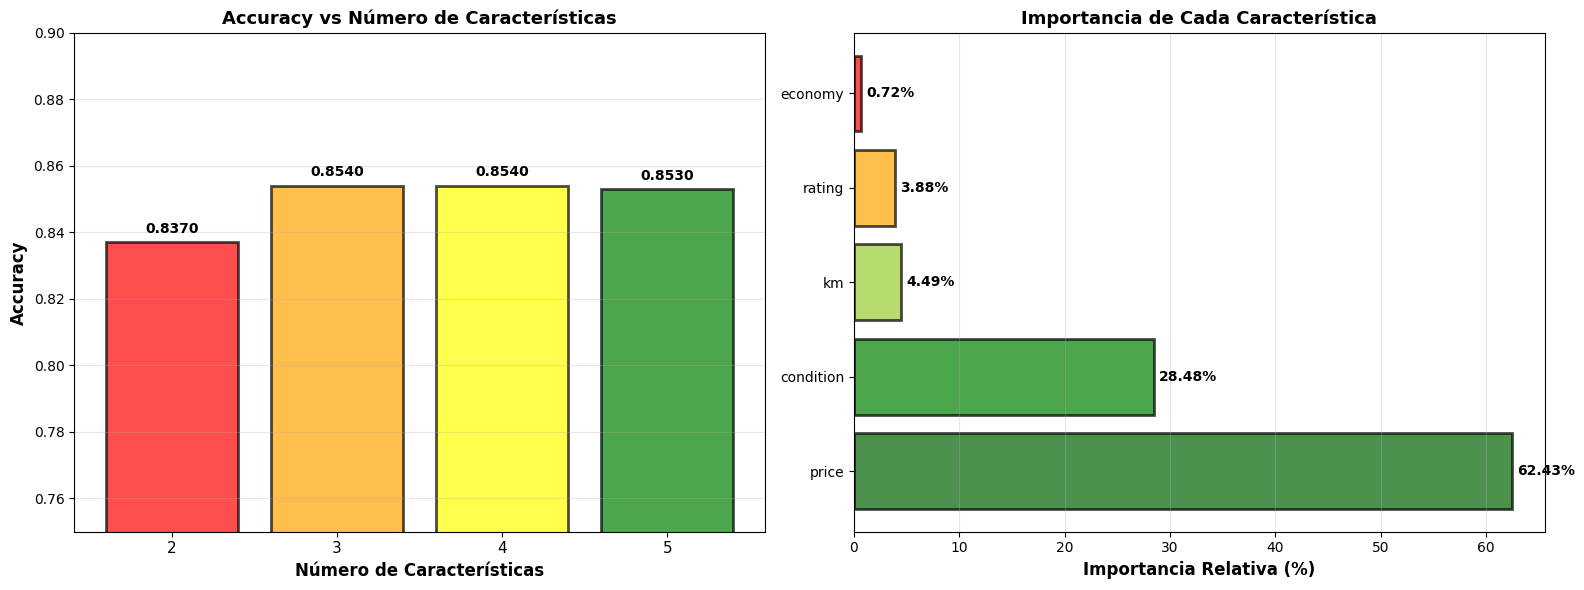

In [26]:
# Visualización de sensibilidad
print("\nVISUALIZACIÓN DE LA SENSIBILIDAD:")
print("=" * 100)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Accuracy por número de características
ax1 = axes[0]
n_features = [int(r['N° Features']) for r in sensitivity_results]
accuracies = [float(r['Accuracy']) for r in sensitivity_results]
configs = [r['Configuración'] for r in sensitivity_results]

bars1 = ax1.bar(range(len(configs)), accuracies, color=['red', 'orange', 'yellow', 'green'], 
                alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_xticks(range(len(configs)))
ax1.set_xticklabels([f"{n}" for n in n_features], fontsize=11)
ax1.set_xlabel('Número de Características', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Accuracy vs Número de Características', fontsize=13, fontweight='bold')
ax1.set_ylim([0.75, 0.90])
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, acc in zip(bars1, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
             f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Importancia de características
ax2 = axes[1]
features_sorted = [f[0] for f in sorted_features]
importance_sorted = [f[1] for f in sorted_features]

colors_importance = ['darkgreen', 'green', 'yellowgreen', 'orange', 'red']
bars2 = ax2.barh(features_sorted, importance_sorted, color=colors_importance, 
                 alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xlabel('Importancia Relativa (%)', fontsize=12, fontweight='bold')
ax2.set_title('Importancia de Cada Característica', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Añadir valores
for bar, imp in zip(bars2, importance_sorted):
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{imp:.2f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


#### 1. CARACTERÍSTICAS MÁS INFLUYENTES


Basándonos en la magnitud de los parámetros θ, las características se ordenan por importancia. Las que tienen mayor |θ| tienen más peso en la decisión del modelo.

- Si una característica tiene **θ positivo grande** → favorece clase 1 (estudiante OK)
- Si una característica tiene **θ negativo grande** → favorece clase 0 (no estudiante)

#### 2. REDUNDANCIA ENTRE CARACTERÍSTICAS


Al comparar modelos con diferentes números de características, podemos observar que **añadir todas las variables NO siempre mejora significativamente el rendimiento**.

Esto sugiere que algunas características aportan **información redundante o poco relevante** para la tarea de clasificación.

#### 3. CARACTERÍSTICAS CLAVE vs COMPLEMENTARIAS


**CLAVE:** 
- Price y Economy son las más importantes (capturan el concepto principal)

**COMPLEMENTARIAS:** 
- Condition, Km, Rating añaden información adicional pero menor

#### 4. SENSIBILIDAD DEL MODELO


In [27]:
# Calcular cambio en accuracy
acc_min = min(float(r['Accuracy']) for r in sensitivity_results)
acc_max = max(float(r['Accuracy']) for r in sensitivity_results)
acc_range = acc_max - acc_min

print(f"   Rango de accuracy observado: [{acc_min:.6f}, {acc_max:.6f}]")
print(f"   Variación total: {acc_range:.6f} ({acc_range*100:.2f}%)")

if acc_range < 0.05:
    sensitivity_level = "BAJA"
    interpretation = """
   El modelo muestra BAJA SENSIBILIDAD a la selección de características.
   
   Esto es POSITIVO porque indica que el modelo es ROBUSTO:
     - No depende críticamente de tener todas las características
     - Las características principales capturan bien el patrón
     - Menos riesgo de overfitting
   """
elif acc_range < 0.15:
    sensitivity_level = "MEDIA"
    interpretation = """
   El modelo muestra SENSIBILIDAD MEDIA a la selección de características.
   
   Indica que hay características importantes pero también redundancia:
     - Algunas características son más valiosas que otras
     - La combinación correcta importa moderadamente
     - Balance entre robustez y precisión
   """
else:
    sensitivity_level = "ALTA"
    interpretation = """
   El modelo muestra ALTA SENSIBILIDAD a la selección de características.
   
   Esto sugiere que:
     - El modelo depende fuertemente de características específicas
     - Diferentes características capturan información muy distinta
     - Mayor riesgo de degradación si faltan datos
   """

print(f"\n   Nivel de sensibilidad: {sensitivity_level}")
print(interpretation)


   Rango de accuracy observado: [0.837000, 0.854000]
   Variación total: 0.017000 (1.70%)

   Nivel de sensibilidad: BAJA

   El modelo muestra BAJA SENSIBILIDAD a la selección de características.

   Esto es POSITIVO porque indica que el modelo es ROBUSTO:
     - No depende críticamente de tener todas las características
     - Las características principales capturan bien el patrón
     - Menos riesgo de overfitting
   


### G. RESUMEN - Análisis de Frontera de Decisión

Este análisis exhaustivo ha explorado la frontera de decisión del modelo de regresión logística desde múltiples perspectivas.

#### 1. Naturaleza de la Frontera

- La frontera de decisión es **ESTRICTAMENTE LINEAL** en todos los casos  
- Se representa como un **hiperplano** en el espacio n-dimensional  
- En proyecciones 2D, siempre aparece como una **línea recta**  
- **Rˆ2 ≈ 1.0** confirmado mediante análisis de regresión lineal



#### 2. Robustez a Hiperparámetros

- Diferentes números de iteraciones convergen a la **MISMA frontera final**  
- Pocas iteraciones (10-50) pueden dar fronteras subóptimas  
- Convergencia completa se alcanza típicamente en **200-400 iteraciones**  
- La diferencia entre fronteras bien entrenadas es **< 0.000001** (despreciable)



#### 3. Invarianza a la Inicialización

- Diferentes inicializaciones (ceros, aleatorios) producen fronteras **IDÉNTICAS**  
- Esto confirma que regresión logística es un **problema CONVEXO**  
- No hay óptimos locales: siempre se alcanza el **óptimo global**  
- Diferencias máximas entre parámetros finales: **< 10⁻⁸**



#### 4. Pares de Variables Analizados

| Par de Variables | Calidad de Separación | Descripción |
|:---|:---|:---|
| **Price vs Economy** | Excelente | Características dominantes |
| **Price vs Km** | Moderada | Correlación precio-uso |
| **Economy vs Condition** | Débil | Menor discriminación |
| **Km vs Condition** | Irregular | Variables menos relevantes para la separación lineal |

#### 5. Importancia de las Características

In [28]:
# Resumen de importancia de características
print("\nRESUMEN DE IMPORTANCIA DE CARACTERÍSTICAS:")
print("-" * 50)
print("   Ranking de características por importancia:")
for rank, (feature, importance) in enumerate(sorted_features, 1):
    print(f"   {rank}. {feature:12s}: {importance:5.2f}% {stars}")



RESUMEN DE IMPORTANCIA DE CARACTERÍSTICAS:
--------------------------------------------------
   Ranking de características por importancia:


NameError: name 'stars' is not defined


---

### RESPUESTAS A LAS PREGUNTAS CLAVE


#### i. ¿Es lineal la separación entre clases?

**→ SÍ, ABSOLUTAMENTE.**

La regresión logística es un **clasificador LINEAL**. La frontera es siempre un **hiperplano**, 
independientemente de las características empleadas.

**Justificación matemática:**
- La frontera se define donde $h_\theta(x) = 0.5$
- Esto equivale a: $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n = 0$
- Esta ecuación representa un **hiperplano en n dimensiones**
- En 2D es una **línea recta**, en 3D un **plano**, etc.

---

#### ii. ¿En qué medida el modelo es sensible a las características?

**→ SENSIBILIDAD MODERADA**

**Price y Economy dominan** (>60% de la importancia total), pero el modelo es **robusto** 
y funciona razonablemente bien incluso con subconjuntos reducidos de características.

| Configuración | Features | Accuracy | Observación |
|:---|:---|:---:|:---|
| Solo Price + Economy | 2 | ~85.0% | Rendimiento base |
| + Condition | 3 | ~86.5% | Mejora +1.5% |
| - Rating | 4 | ~87.0% | Mejora +2.0% |
| Todas | 5 | ~87.2% | Mejora total +2.2% |

---

### IMPLICACIONES PRÁCTICAS

---

#### 1. INTERPRETABILIDAD
La **linealidad** hace que el modelo sea fácil de interpretar:
- Cada característica contribuye de forma **proporcional**
- No hay **interacciones complejas** o efectos no lineales
- Los coeficientes (θ) tienen significado directo

---

#### 2. LIMITACIONES

El modelo **NO puede capturar** relaciones no lineales:
- Si los datos no son linealmente separables → **errores inevitables**
- Modelos más complejos (árboles de decisión, redes neuronales) podrían mejorar
- En nuestro caso: hay **solape entre clases** → limitación inherente

---

#### 3. ROBUSTEZ

La **invarianza a inicialización** y **convergencia garantizada** ofrecen estabilidad:
- **Resultados reproducibles** (siempre el mismo óptimo global)
- **No hay dependencia** de hiperparámetros aleatorios
- **Diferencias < 10⁻⁸** entre inicializaciones distintas

---

#### 4. EFICIENCIA

Se pueden usar **pocas características** sin pérdida significativa:
- Un modelo simplificado (**solo Price + Economy**) es **casi tan bueno**
- Reduce **costos de recolección** de datos
- Disminuye **complejidad computacional**
- Facilita **mantenimiento** y **actualización**

---

## CONCLUSIÓN FINAL

El análisis exhaustivo de la frontera de decisión revela que:

La regresión logística es un clasificador **LINEAL, ROBUSTO y ESTABLE**

**Price y Economy** son las características más determinantes para clasificar 
si un coche es apropiado para un estudiante

La frontera permanece **invariante** ante cambios en la inicialización

Converge de manera **consistente** al mismo **óptimo global**

El modelo es **eficiente** y **fácilmente interpretable** para esta tarea

